In [ ]:
pip install fix-yahoo-finance

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [3]:
symbols = ['AAPL','MSFT','AMD','NVDA']
start = '2021-01-01'
end = '2021-09-11'

# Read data 
dataset = yf.download(symbols,start,end)['Adj Close']

# View Columns
dataset.head()

[*********************100%***********************]  4 of 4 completed


,AAPL,AMD,MSFT,NVDA
Date,,,,
2021-01-04,128.617096,92.300003,215.880432,131.020554
2021-01-05,130.207291,92.769997,216.088669,133.930511
2021-01-06,125.824326,90.330002,210.485641,126.034920
2021-01-07,130.117859,95.160004,216.475433,133.323547
2021-01-08,131.240921,94.580002,217.794373,132.651627


In [4]:
# Calculate Daily Returns
returns = dataset.pct_change()


In [5]:
returns = returns.dropna()


In [6]:
returns.head()


,AAPL,AMD,MSFT,NVDA
Date,,,,
2021-01-05,0.012364,0.005092,0.000965,0.022210
2021-01-06,-0.033661,-0.026302,-0.025929,-0.058953
2021-01-07,0.034123,0.053471,0.028457,0.057830
2021-01-08,0.008631,-0.006095,0.006093,-0.005040
2021-01-11,-0.023249,0.028230,-0.009698,0.025967


In [7]:
# Calculate mean returns
meanDailyReturns = returns.mean()
print(meanDailyReturns)

AAPL    0.000972
AMD     0.001063
MSFT    0.001889
NVDA    0.003454
dtype: float64


In [8]:
# Calculate std returns
stdDailyReturns = returns.std()
print(stdDailyReturns)

AAPL    0.016216
AMD     0.024857
MSFT    0.012638
NVDA    0.025768
dtype: float64


In [9]:
# Define weights for the portfolio
weights = np.array([0.5, 0.2, 0.2, 0.1])

In [10]:
# Calculate the covariance matrix on daily returns
cov_matrix = (returns.cov())*250
print (cov_matrix)

          AAPL       AMD      MSFT      NVDA
AAPL  0.065740  0.048690  0.035982  0.054817
AMD   0.048690  0.154463  0.036402  0.107966
MSFT  0.035982  0.036402  0.039930  0.048425
NVDA  0.054817  0.107966  0.048425  0.165999


In [11]:
# Calculate expected portfolio performance
portReturn = np.sum(meanDailyReturns*weights)

In [12]:
# Print the portfolio return
print(portReturn)

0.0014216652374119511


In [13]:
# Create portfolio returns column
returns['Portfolio'] = returns.dot(weights)


In [14]:
returns.head()

,AAPL,AMD,MSFT,NVDA,Portfolio
Date,,,,,
2021-01-05,0.012364,0.005092,0.000965,0.022210,0.009614
2021-01-06,-0.033661,-0.026302,-0.025929,-0.058953,-0.033172
2021-01-07,0.034123,0.053471,0.028457,0.057830,0.039230
2021-01-08,0.008631,-0.006095,0.006093,-0.005040,0.003811
2021-01-11,-0.023249,0.028230,-0.009698,0.025967,-0.005321


In [15]:
# Calculate cumulative returns
daily_cum_ret=(1+returns).cumprod()
print(daily_cum_ret.tail())
 

                AAPL       AMD      MSFT      NVDA  Portfolio
Date                                                         
2021-09-03  1.197937  1.190899  1.392392  1.743253   1.293534
2021-09-07  1.216492  1.182557  1.387953  1.729441   1.299890
2021-09-08  1.204225  1.150271  1.388091  1.704791   1.284412
2021-09-09  1.196151  1.150054  1.374405  1.692428   1.276593
2021-09-10  1.156556  1.139762  1.367285  1.715399   1.253589


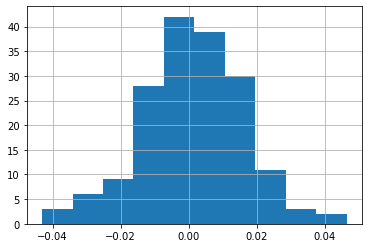

In [16]:
returns['Portfolio'].hist()
plt.show()

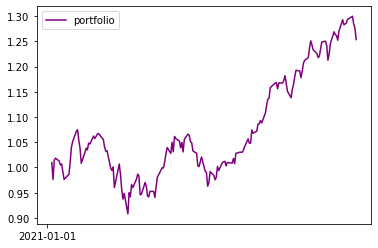

In [17]:
import matplotlib.dates

# Plot the portfolio cumulative returns only
fig, ax = plt.subplots()
ax.plot(daily_cum_ret.index, daily_cum_ret.Portfolio, color='purple', label="portfolio")
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
plt.legend()
plt.show()

In [18]:
# Print the mean
print("mean : ", returns['Portfolio'].mean()*100)

# Print the standard deviation
print("Std. dev: ", returns['Portfolio'].std()*100)

# Print the skewness
print("skew: ", returns['Portfolio'].skew())

# Print the kurtosis
print("kurt: ", returns['Portfolio'].kurtosis())


mean :  0.14216652374119507
Std. dev:  1.5159762783780348
skew:  -0.23551209854028696
kurt:  0.5219910732781625


In [19]:
# Calculate the standard deviation by taking the square root
port_standard_dev = np.sqrt(np.dot(weights.T, np.dot(weights, cov_matrix)))

# Print the results 
print(str(np.round(port_standard_dev, 4) * 100) + '%')


23.97%


In [20]:
# Calculate the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix, weights))

# Print the result
print(str(np.round(port_variance, 4) * 100) + '%')

5.75%


In [21]:
# Calculate total return and annualized return from price data 
total_return = (returns['Portfolio'][-1] - returns['Portfolio'][0]) / returns['Portfolio'][0]

# Annualize the total return over 6 year 
annualized_return = ((total_return + 1)**(1/6))-1

In [22]:
# Calculate annualized volatility from the standard deviation
vol_port = returns['Portfolio'].std() * np.sqrt(250)

In [24]:
# Create a downside return column with the negative returns only
target = 0
downside_returns = returns.loc[returns['Portfolio'] < target]

# Calculate expected return and std dev of downside
expected_return = returns['Portfolio'].mean()
down_stdev = downside_returns.std()

# Calculate the sortino ratio
rf = 0.01
sortino_ratio = (expected_return - rf)/down_stdev

# Print the results
print("Expected return: ", expected_return*100)
print('-' * 50)
print("Downside risk:")
print(down_stdev*100)
print('-' * 50)
print("Sortino ratio:")
print(sortino_ratio)

Expected return:  0.14216652374119507
--------------------------------------------------
Downside risk:
AAPL         1.148756
AMD          1.749411
MSFT         0.983277
NVDA         2.284453
Portfolio    1.006321
dtype: float64
--------------------------------------------------
Sortino ratio:
AAPL        -0.746750
AMD         -0.490356
MSFT        -0.872423
NVDA        -0.375509
Portfolio   -0.852446
dtype: float64


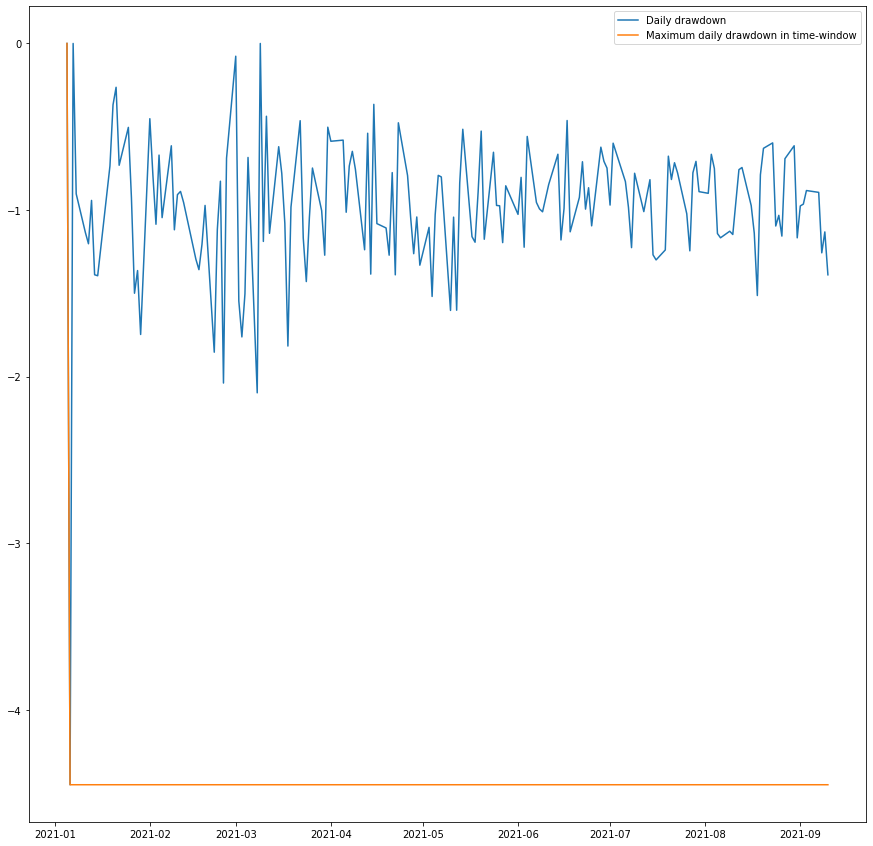

In [25]:
# Calculate the max value 
roll_max = returns['Portfolio'].rolling(center=False,min_periods=1,window=252).max()

# Calculate the daily draw-down relative to the max
daily_draw_down = returns['Portfolio']/roll_max - 1.0

# Calculate the minimum (negative) daily draw-down
max_daily_draw_down = daily_draw_down.rolling(center=False,min_periods=1,window=252).min()

# Plot the results
plt.figure(figsize=(15,15))
plt.plot(returns.index, daily_draw_down, label='Daily drawdown')
plt.plot(returns.index, max_daily_draw_down, label='Maximum daily drawdown in time-window')
plt.legend()
plt.show()
